In [1]:
%pylab inline
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
masa = '5e-04'
Delta='-0.9'
file = h5py.File('/mnt/projects/bias_mock/galaxies/galpos_RedSample_'+masa+'.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
#v0 = np.loadtxt('/mnt/projects/bias_mock/voids/sphvds_raul-RedSample_'+masa+Delta+'.dat')
v0 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_0_clean_-0.9.dat',delimiter=',',skiprows=1)
centres = v0[:,0:3]
nvoids = len(centres)

In [3]:
v1 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_5_clean_-0.9.dat',delimiter=',',skiprows=1)
centres1 = v1[:,0:3]
nvoids1 = len(centres1)

v2 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_10_clean_-0.9.dat',delimiter=',',skiprows=1)
centres2 = v2[:,0:3]
nvoids2 = len(centres2)

v3 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_15_clean_-0.9.dat',delimiter=',',skiprows=1)
centres3 = v3[:,0:3]
nvoids3 = len(centres3)

In [4]:
dz = 20

mask_galaxies, = np.where(pos[:,2]<dz)
print('galaxias en slice:',len(mask_galaxies))

mask_voids, = np.where(centres[:,2]<dz)
print('voids en slice:',len(mask_voids))

mask_voids1, = np.where(centres1[:,2]<dz)
print('voids en slice:',len(mask_voids1))

mask_voids2, = np.where(centres2[:,2]<dz)
print('voids en slice:',len(mask_voids2))

mask_voids3, = np.where(centres3[:,2]<dz)
print('voids en slice:',len(mask_voids3))

galaxias en slice: 19613
voids en slice: 165
voids en slice: 85
voids en slice: 25
voids en slice: 6


(900.0, 1400.0)

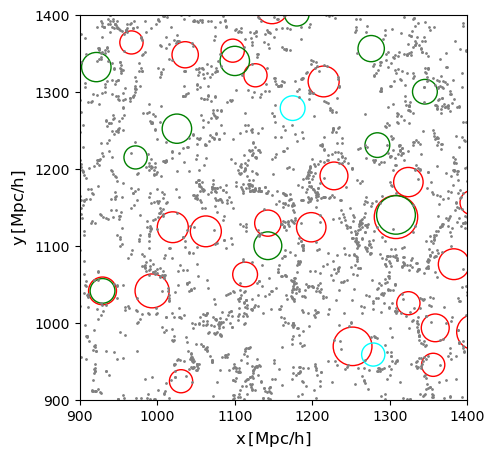

In [5]:
plt.figure(figsize=(5,5))
plt.plot(pos[mask_galaxies,0],pos[mask_galaxies,1],ls='none',marker='o',markersize=1,color='grey')

for i in range(len(mask_voids)):
    x = centres[mask_voids,0][i]
    y = centres[mask_voids,1][i]
    r = v0[mask_voids,3][i]
    circulo = plt.Circle((x, y), r, color='red', fill=False)

    plt.gca().add_artist(circulo)

for i in range(len(mask_voids1)):
    x = centres1[mask_voids1,0][i]
    y = centres1[mask_voids1,1][i]
    r = v1[mask_voids1,3][i]
    circulo = plt.Circle((x, y), r, color='green', fill=False)

    plt.gca().add_artist(circulo)

for i in range(len(mask_voids2)):
    x = centres2[mask_voids2,0][i]
    y = centres2[mask_voids2,1][i]
    r = v2[mask_voids2,3][i]
    circulo = plt.Circle((x, y), r, color='cyan', fill=False)

    plt.gca().add_artist(circulo)
    
    
plt.xlabel('$ \\rm x\,[Mpc/h]$',size=12)
plt.ylabel('$ \\rm y\,[Mpc/h]$',size=12)
plt.xlim(900,1400)
plt.ylim(900,1400)

### voy a buscar para cada void sin smooth el void mas cernano en smoothed fields

In [6]:
import grispy as gsp

lbox = 1440
periodic = {0: (0, lbox), 1: (0, lbox), 2: (0, lbox)}
grid1 = gsp.GriSPy(centres1, N_cells=32, periodic = periodic)
grid2 = gsp.GriSPy(centres2, N_cells=32, periodic = periodic)

In [27]:
# selecciono los voids mas masivos

sel, = np.where(v0[:,3] > 30)

lower_radii = 0
k = 0
for i in range(len(sel)):
    centro = np.array([centres[sel,:][i]])
    
    upper_radii = 2*v0[sel,3][i]
    
    shell_dist, shell_ind = grid1.shell_neighbors(
    centro,
    distance_lower_bound=lower_radii,
    distance_upper_bound=upper_radii
    )
    
    if len(shell_dist[0])>0:
        k = k + 1
        
print(k/len(sel))

0.9875


# ¿ Porque el suavizado me borra tantos voids ? 

In [24]:
f0 = np.load('/mnt/projects/bias_mock/galaxies/smoothed_fields/PL/galpos_RedSample_5e-04_0.npy')
f1 = np.load('/mnt/projects/bias_mock/galaxies/smoothed_fields/PL/galpos_RedSample_5e-04_5.npy')

In [25]:
v1 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_0_clean_-0.9.dat',delimiter=',',skiprows=1)
centres1 = v1[:,0:3]
nvoids1 = len(centres1)

v2 = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_5_clean_-0.9.dat',delimiter=',',skiprows=1)
centres2 = v2[:,0:3]
nvoids2 = len(centres2)

In [26]:
lbox = 1440
periodic = {0: (0, lbox), 1: (0, lbox), 2: (0, lbox)}
grid1 = gsp.GriSPy(centres1, N_cells=32, periodic = periodic)
grid2 = gsp.GriSPy(centres2, N_cells=32, periodic = periodic)

In [18]:
# selecciono un void
vid = 1000
x0 = v1[vid,0]
y0 = v1[vid,1]
z0 = v1[vid,2]

centro = np.array([centres[sel,:][i]])
    
upper_radii = v1[vid,3]
lower_radii = 0
shell_dist, shell_ind = grid2.shell_neighbors(
centro,
distance_lower_bound=lower_radii,
distance_upper_bound=upper_radii
)

if len(shell_dist[0]) == 0:
    print('no hay vecino')

no hay vecino


## veo que hay en esa posicion despues de suavizar

In [21]:
bin_size = 1440/540

bx = int(x0/bin_size)
by = int(y0/bin_size)
bz = int(z0/bin_size)

print(f0[bx,by,bz])
print(f1[bx,by,bz])

-1.0000001
-0.9999999
